In [1]:
import os
import sys
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dropout, Dense, Conv2D, Conv1D, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape, MaxPooling1D, MaxPooling2D, AveragePooling1D, AveragePooling2D
from tensorflow.keras.layers import LSTM, ConvLSTM2D, Bidirectional, Masking, TimeDistributed
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import BatchNormalization,Add,Subtract,Multiply,Average,Maximum,Minimum,Concatenate
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.constraints import MaxNorm,MinMaxNorm,NonNeg,UnitNorm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,LearningRateScheduler
from tensorflow.keras import backend as K

def suppress_tensorflow_warnings():
    #----------- Supress Tensorflow version warnings----------------------
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

    # https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

    tf.get_logger().setLevel('INFO')
    tf.autograph.set_verbosity(0)

    tf.get_logger().setLevel(logging.ERROR)
    #-----------------------------------------------------------------------
    return

def set_gpu_device(gpuid):
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(gpuid)
    if len(gpuid)>0:    # i.e. we're using a gpu
        # config = tf.compat.v1.ConfigProto()
        config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
        # config.gpu_options.per_process_gpu_memory_fraction = 0.1
        config.gpu_options.allow_growth=True
        # K.set_session(tf.compat.v1.Session(config=config))
        K.set_session(tf.compat.v1.Session(graph=tf.get_default_graph(),config=config))
    return
set_gpu_device('0')

# Sanity check on iris.csv

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
dataframe = read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)
# kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
model=baseline_model()
# Fit the model
history=model.fit(X, dummy_y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, dummy_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [ ]:
plt.plot(history.history['loss'])

# testing gen_act data

In [6]:
np_file = '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_data_rnd_RL.npz'
data=np.load(np_file,allow_pickle=True)
len(data['actions'])

98892

In [17]:
Y=data['actions']
X=data['obs']
total_size = len(data['actions'])

In [17]:
total_size = len(data['actions'])
# total_size = 10000
train_size = int(0.7 * total_size)
X=data['obs'][:total_size]
Y=data['actions'][:total_size]
# X=np.random.normal(size=(total_size,7))
# Y=np.random.randint(4,size=total_size)
dummy_y = to_categorical(Y,num_classes=4)
X.shape

(98892, 7)

In [15]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)


Train on 69224 samples
Epoch 1/1000
69224/69224 [==============================] - 2s 26us/sample - loss: 1.4066 - acc: 0.2509
Epoch 2/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3882 - acc: 0.2496
Epoch 3/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3871 - acc: 0.2517
Epoch 4/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3864 - acc: 0.2522
Epoch 5/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3865 - acc: 0.2522
Epoch 6/1000
69224/69224 [==============================] - 2s 26us/sample - loss: 1.3865 - acc: 0.2508
Epoch 7/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3863 - acc: 0.2504
Epoch 8/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3863 - acc: 0.2518
Epoch 9/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3864 - acc: 0.2521
Epoch 10/1000
69224/69224 [==============

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3860 - acc: 0.2568
Epoch 79/1000
69224/69224 [==============================] - 2s 26us/sample - loss: 1.3859 - acc: 0.2563
Epoch 80/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2574
Epoch 81/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2551
Epoch 82/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2547
Epoch 83/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2569
Epoch 84/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2546
Epoch 85/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2554
Epoch 86/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3859 - acc: 0.2564
Epoch 87/1000
69224/69224 [==============================] - 2s 25us/

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2577
Epoch 156/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2569
Epoch 157/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2569
Epoch 158/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2573
Epoch 159/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2583
Epoch 160/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2580
Epoch 161/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2577
Epoch 162/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3857 - acc: 0.2583
Epoch 163/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3858 - acc: 0.2568
Epoch 164/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3857 - acc: 0.2557
Epoch 233/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2577
Epoch 234/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2580
Epoch 235/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2581
Epoch 236/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3857 - acc: 0.2574
Epoch 237/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2569
Epoch 238/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2579
Epoch 239/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2585
Epoch 240/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2579
Epoch 241/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2593
Epoch 310/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3853 - acc: 0.2587
Epoch 311/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3854 - acc: 0.2589
Epoch 312/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3856 - acc: 0.2563
Epoch 313/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3856 - acc: 0.2577
Epoch 314/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3855 - acc: 0.2580
Epoch 315/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3855 - acc: 0.2569
Epoch 316/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3855 - acc: 0.2592
Epoch 317/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3855 - acc: 0.2562
Epoch 318/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2590
Epoch 387/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2586
Epoch 388/1000
69224/69224 [==============================] - 2s 26us/sample - loss: 1.3855 - acc: 0.2559
Epoch 389/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2595
Epoch 390/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2578
Epoch 391/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3853 - acc: 0.2579
Epoch 392/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2595
Epoch 393/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3853 - acc: 0.2590
Epoch 394/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3854 - acc: 0.2577
Epoch 395/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3852 - acc: 0.2601
Epoch 464/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3851 - acc: 0.2593
Epoch 465/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3852 - acc: 0.2593
Epoch 466/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3851 - acc: 0.2591
Epoch 467/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3851 - acc: 0.2591
Epoch 468/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3856 - acc: 0.2577
Epoch 469/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3853 - acc: 0.2586
Epoch 470/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3852 - acc: 0.2585
Epoch 471/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3851 - acc: 0.2595
Epoch 472/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2601
Epoch 541/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3851 - acc: 0.2599
Epoch 542/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3850 - acc: 0.2591
Epoch 543/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2582
Epoch 544/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3850 - acc: 0.2597
Epoch 545/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2606
Epoch 546/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3849 - acc: 0.2589
Epoch 547/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3850 - acc: 0.2601
Epoch 548/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3849 - acc: 0.2605
Epoch 549/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2600
Epoch 618/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3848 - acc: 0.2604
Epoch 619/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2605
Epoch 620/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3849 - acc: 0.2612
Epoch 621/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2608
Epoch 622/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2611
Epoch 623/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2599
Epoch 624/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3849 - acc: 0.2610
Epoch 625/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3849 - acc: 0.2606
Epoch 626/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2583
Epoch 695/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2604
Epoch 696/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3848 - acc: 0.2595
Epoch 697/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2597
Epoch 698/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3849 - acc: 0.2610
Epoch 699/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2586
Epoch 700/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3848 - acc: 0.2603
Epoch 701/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3848 - acc: 0.2607
Epoch 702/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3847 - acc: 0.2595
Epoch 703/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2605
Epoch 772/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2600
Epoch 773/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2613
Epoch 774/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2601
Epoch 775/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2605
Epoch 776/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3846 - acc: 0.2607
Epoch 777/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3847 - acc: 0.2607
Epoch 778/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3847 - acc: 0.2599
Epoch 779/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3847 - acc: 0.2604
Epoch 780/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 24us/sample - loss: 1.3847 - acc: 0.2621
Epoch 849/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3848 - acc: 0.2590
Epoch 850/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2605
Epoch 851/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3848 - acc: 0.2600
Epoch 852/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2608
Epoch 853/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3846 - acc: 0.2618
Epoch 854/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2605
Epoch 855/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2609
Epoch 856/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3846 - acc: 0.2611
Epoch 857/1000
69224/69224 [==============================] -

69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2597
Epoch 926/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3847 - acc: 0.2598
Epoch 927/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2613
Epoch 928/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2607
Epoch 929/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2610
Epoch 930/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3846 - acc: 0.2612
Epoch 931/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3845 - acc: 0.2586
Epoch 932/1000
69224/69224 [==============================] - 2s 25us/sample - loss: 1.3847 - acc: 0.2601
Epoch 933/1000
69224/69224 [==============================] - 2s 24us/sample - loss: 1.3845 - acc: 0.2594
Epoch 934/1000
69224/69224 [==============================] -

<IPython.core.display.Javascript object>


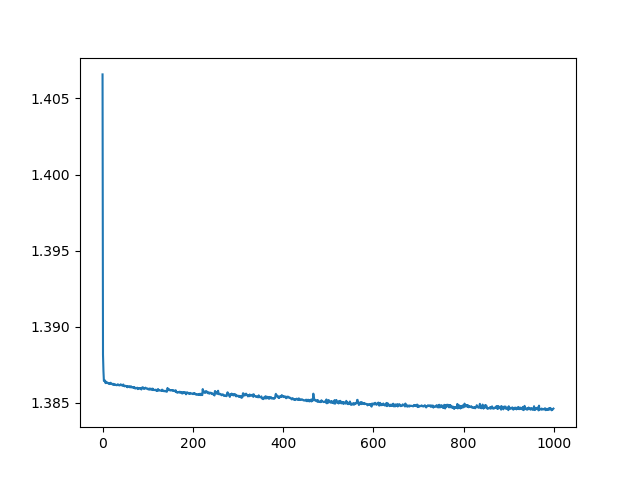

In [18]:
# Y=np.ones_like(Y)
# define baseline model
def baseline_model():
    # create model
#     K.clear_session()
    model = Sequential()
    model.add(Dense(256, input_dim=7, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(512, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    # Compile model
    opt=optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model=baseline_model()
# Fit the model
history=model.fit(X[:train_size], dummy_y[:train_size], epochs=1000, batch_size=100)
# evaluate the model
scores = model.evaluate(X[train_size:], dummy_y[train_size:])
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
plt.plot(history.history['loss'])

In [6]:
np.mean(X,axis=0)

array([0.32094108, 0.12257965, 0.19414617, 0.01194292, 0.0067241 ,
       0.0037791 , 0.02312364])

<IPython.core.display.Javascript object>


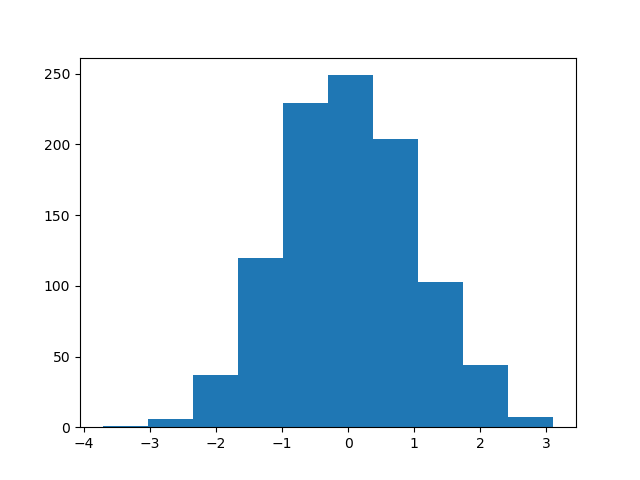

(array([  1.,   6.,  37., 120., 229., 249., 204., 103.,  44.,   7.]),
 array([-3.71659191, -3.03432253, -2.35205316, -1.66978379, -0.98751441,
        -0.30524504,  0.37702433,  1.05929371,  1.74156308,  2.42383245,
         3.10610183]),
 <a list of 10 Patch objects>)

In [31]:
plt.hist(X[:,5])

In [33]:
Y

array([1, 1, 0, 0, 2, 3, 0, 2, 1, 0, 0, 1, 0, 1, 2, 3, 0, 2, 3, 0, 3, 1,
       2, 2, 3, 2, 1, 3, 3, 1, 2, 3, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2,
       3, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 2, 1, 0, 0, 3, 1, 3, 0, 1, 1, 3, 0, 0, 1, 2, 3, 3, 1, 1, 3,
       0, 2, 0, 3, 1, 2, 0, 3, 0, 3, 2, 0, 2, 3, 1, 1, 1, 3, 3, 1, 3, 0,
       0, 2, 3, 2, 2, 3, 0, 2, 3, 2, 0, 2, 1, 0, 2, 0, 3, 2, 1, 2, 0, 3,
       3, 1, 2, 2, 1, 1, 0, 1, 2, 1, 3, 0, 1, 3, 0, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 1, 3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 1, 2, 0, 1, 3, 0, 2,
       0, 1, 0, 1, 3, 1, 3, 0, 3, 3, 0, 1, 0, 0, 1, 2, 3, 3, 0, 1, 2, 1,
       3, 3, 1, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 0, 0, 2, 1, 3, 3, 3, 1, 3,
       2, 3, 1, 1, 2, 0, 3, 0, 0, 3, 3, 1, 3, 2, 0, 2, 0, 2, 1, 0, 0, 2,
       0, 2, 3, 3, 3, 2, 2, 2, 1, 0, 0, 3, 0, 1, 1, 1, 0, 3, 2, 2, 3, 0,
       3, 2, 3, 3, 2, 2, 3, 0, 2, 1, 3, 1, 3, 0, 2, 3, 0, 2, 3, 3, 3, 1,
       3, 3, 3, 1, 2, 3, 0, 3, 0, 0, 2, 3, 3, 2, 1,